In [36]:
import numpy as np
import math
import random as rand
import time
import datetime
from numpy import linalg as LA
import matplotlib
import matplotlib.pyplot as plt
# Setting the figure size that will be used when plots are created.
plt.rcParams['figure.figsize'] = [12, 7]

In [12]:
small = np.loadtxt("CS205_small_testdata__3.txt")
large = np.loadtxt('CS205_large_testdata__36.txt')
small_scaled = (small-np.amin(small, axis=0))/(np.amax(small, axis=0)-np.amin(small,axis=0))
large_scaled = (large-np.amin(large, axis=0))/(np.amax(large, axis=0)-np.amin(large,axis=0))

In [13]:
# Creating a function that will perform kNN
def knn(mat, crnt_set_, new_ftr, add = True):
    '''Compute accuracy of knn with k=1 for the given set of features
    '''
    acc = 0
    # Deep copy not to midfy the object in the calling function
    crnt_set = crnt_set_[:]
    # Add or remove feature to the set depending whether forward or backward selection is used
    # For backward the first iteration does not remove anything which is controlled by providing
    # None for the new_ftr
    if new_ftr is not None:
        if add: 
            crnt_set.append(new_ftr)
        else:
            crnt_set.remove(new_ftr)
    
    # Recognizing that distance between row j and k is the same as between k and j allow to save 
    # computation and for each row compute distance from all the rows below it
    dist_mat = np.zeros((len(mat), len(mat)))
    np.fill_diagonal(dist_mat, np.inf)   # In order to ignore distance to itself being the minimum
  
    for i in range(0,len(mat)):
        obs = mat[i,crnt_set]    # The observation to classify
        # Compute distance from current row to all rows below it
        dist_mat[i+1:, i] = LA.norm(obs-mat[i+1:,crnt_set], axis=1)
    # Get the full distance matrix by adding to it its transpose due to symmetry
    dist = dist_mat + dist_mat.T
    closest_idcs = np.argmin(dist, axis=1)  # Get index of lowest distance for each row
    # Compute accuracy by counting the number of labels that are the same as the lowest distance label
    acc = np.count_nonzero(mat[:,0]==mat[closest_idcs,0])
    return (acc/(len(mat)))

In [14]:
def fwd_ftr_search(mat):
    # List to keep track of all the current features
    crnt_ftr = []
    levels_best = []
    
    # Each level of the search tree
    for i in range(1,len(mat[1,:])):
        start = time.time()
        # List to keep track of the added feature
        add_ftr = -1
        # Keeps track of the best accuracy
        best_acc = -1
        print("On the", i, "th level of the search tree")
        
        # At each level, we want to see which features we can add
        for j in range(1,len(mat[1,:])):
            #print(j)
            #print(crnt_ftr)
            # At each level, I want to test the accuracy of adding a certain feature
            # but I don't want to consider a feature that's already included
            if j not in crnt_ftr:
                #print("  Considering adding the ", j, "feature")
                # Calculate the accuracy for the given set of features
                acc = knn(mat, crnt_ftr, j, add=True)  # Direct knn function to add feature to the list
                #acc = acc_class(j)
                # Checking if we should add this feature based on how it compares
                # to the best accuracy so far.
                #print(best_acc,acc)
                if acc > best_acc:
                    best_acc = acc
                    add_ftr = j # This is always updated when the accuracy is better.
                #print(add_ftr)
                
        # After we check all the features that we can add at this level
        # we want to make the current feature set is updated based on the best feature   
        crnt_ftr.append(add_ftr) 
        # The best combination of features and its accuracy at the current level
        levels_best.append((best_acc,crnt_ftr[:]))  # [:] is a copy of what is in the list now
        #print(add_ftr)
        print("*On level ", i, "added feature", add_ftr, "to current set*", "accuracy", best_acc, "time for level is", 
              round(time.time() - start,3))
        #print(crnt_ftr)
        #print(crnt_ftr)
        #print(len(set(crnt_ftr)))
    return(levels_best)

In [15]:
##### Forward Selection with Small Dataset #######
print(datetime.datetime.now().time())
start = time.time()
# Testing the ftr_search function with the large dataset
acc_small_fwd = fwd_ftr_search(small)
end = time.time()
temp = end-start
print(temp)
hours = temp//3600
temp = temp - 3600*hours
minutes = temp//60
seconds = temp - 60*minutes
print('%d:%d:%d' %(hours,minutes,seconds))
print(f"--- {(time.time() - start):.4f} seconds ---")
print(datetime.datetime.now().time())

10:00:59.163496
On the 1 th level of the search tree
*On level  1 added feature 4 to current set* accuracy 0.84 time for level is 0.129
On the 2 th level of the search tree
*On level  2 added feature 6 to current set* accuracy 0.9466666666666667 time for level is 0.08
On the 3 th level of the search tree
*On level  3 added feature 10 to current set* accuracy 0.9366666666666666 time for level is 0.101
On the 4 th level of the search tree
*On level  4 added feature 9 to current set* accuracy 0.92 time for level is 0.073
On the 5 th level of the search tree
*On level  5 added feature 7 to current set* accuracy 0.8966666666666666 time for level is 0.063
On the 6 th level of the search tree
*On level  6 added feature 8 to current set* accuracy 0.8833333333333333 time for level is 0.051
On the 7 th level of the search tree
*On level  7 added feature 1 to current set* accuracy 0.8333333333333334 time for level is 0.054
On the 8 th level of the search tree
*On level  8 added feature 2 to curre

In [41]:
# Sorting the list of results by the length of the feature list
def getKey(item):
    return(len(item[1]))
acc_small_fwd = sorted(acc_small_fwd, key = getKey)
acc_small_fwd

[(0.84, [4]),
 (0.9466666666666667, [4, 6]),
 (0.9366666666666666, [4, 6, 10]),
 (0.92, [4, 6, 10, 9]),
 (0.8966666666666666, [4, 6, 10, 9, 7]),
 (0.8833333333333333, [4, 6, 10, 9, 7, 8]),
 (0.8333333333333334, [4, 6, 10, 9, 7, 8, 1]),
 (0.8033333333333333, [4, 6, 10, 9, 7, 8, 1, 2]),
 (0.7633333333333333, [4, 6, 10, 9, 7, 8, 1, 2, 5]),
 (0.7366666666666667, [4, 6, 10, 9, 7, 8, 1, 2, 5, 3])]

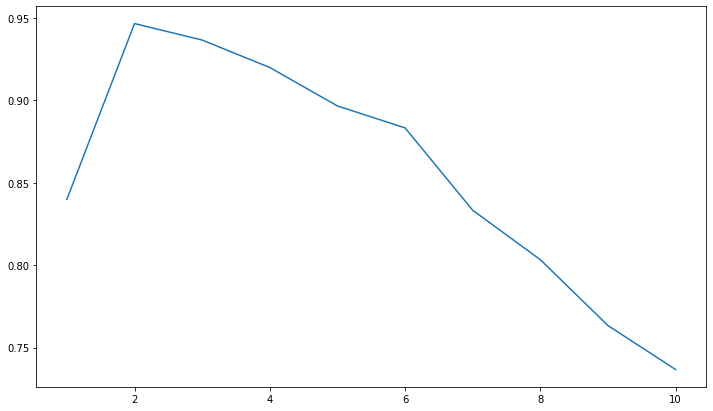

In [71]:
# Creating plot of accuracy vs. level for the small dataset 
# with forward selection
sml_lvls = [i+1 for i in range(0,len(acc_small_fwd))]
fwd_sml_acc = [acc_small_fwd[i][0] for i in range(0,len(acc_small_fwd))]
acc_sml
plt.plot(sml_lvls,fwd_sml_acc)
plt.show()

In [8]:
##### Forward Selection with Large Dataset #######
print(datetime.datetime.now().time())
start = time.time()
# Testing the ftr_search function with the large dataset
#acc_large_fwd = fwd_ftr_search(large_scaled)
end = time.time()
temp = end-start
print(temp)
hours = temp//3600
temp = temp - 3600*hours
minutes = temp//60
seconds = temp - 60*minutes
print('%d:%d:%d' %(hours,minutes,seconds))
print(f"--- {(time.time() - start)/60:.4f} minutes ---")
print(datetime.datetime.now().time())

09:00:33.336126
3.409385681152344e-05
0:0:0
--- 0.0000 minutes ---
09:00:33.337882


In [ ]:
# Creating plot of accuracy vs. level for the large dataset 
# with forward selection
large_lvls = [i+1 for i in range(0,len(acc_large_fwd))]
fwd_large_acc = [acc_large_fwd[i][0] for i in range(0,len(acc_large_fwd))]
acc_sml
plt.plot(large_lvls,fwd_large_acc)
plt.show()

In [55]:
def backward_ftr_search(mat):
    # List to keep track of all the current features
    crnt_ftr = [i for i in range(1,len(mat[1,:]))]
    levels_best = []
    print(crnt_ftr)
    # The accuracy with all possible features. Direct knn function to not remove anything from the feature list
    # in this case by setting new_ftr argument to None
    init_acc = knn(mat,crnt_ftr,None, add = False)
    levels_best.append((init_acc, crnt_ftr[:]))
    print(f"With all features accuracy {init_acc}")
     
    # Not removing the last feature so we have initial level with all features, plus 
    # P-1 levels, where P is number of features
    for i in range(1,len(mat[1,:])-1):
        start = time.time()
        # On the first level, we want the least accuracy to 
        # be the initial accuracy that we c
        # List to keep track of the removed feature
        rmv_ftr = -1
        # Keeps track of the best accuracy
        best_acc = -1
        print("On the", i, "th level of the search tree")
        
        # At each level, we want to see which feature we can remove
        for j in range(1,len(mat[1,:])):
            # At each level, I want to test the accuracy of adding a certain feature
            # but I don't want to consider a feature that's already included
            if j in crnt_ftr:
#                 print("  Considering removing the ", j, "feature")
                # Calculate the accuracy for the given set of features
                acc = knn(mat, crnt_ftr, j, add = False)  # Direct knn function to remove feature from the list
                #acc = acc_class(j)
                # Checking if we should remove this feature based on how it compares
                # to the best accuracy so far.
                #print(best_acc,acc)
                if acc > best_acc:
                    best_acc = acc
                    rmv_ftr = j # This is always updated when the accuracy is worse.
                #print(add_ftr)
                
        # After we check all the features that we can remove at this level
        # we want to make the current feature set is updated based on the removal of 
        # the worst feature   
        crnt_ftr.remove(rmv_ftr) 
        # The best combination of features and its accuracy at the current level
        levels_best.append((best_acc,crnt_ftr[:]))  # [:] is a copy of what is in the list now
#         print(crnt_ftr)
        print("*On level ", i, "removed feature",rmv_ftr, "to current set*", "accuracy", best_acc, "time for level is", 
              round(time.time() - start,3))
        #print(crnt_ftr)
        #print(crnt_ftr)
        #print(len(set(crnt_ftr)))
    return(levels_best)

In [60]:
##### Backward Elimination with Small Dataset #######

print(datetime.datetime.now().time())
start = time.time()
# Testing the ftr_search function with the large datasetacc_small_bwd = 
print(backward_ftr_search(small_scaled))
end = time.time()
temp = end-start
print(temp)
hours = temp//3600
temp = temp - 3600*hours
minutes = temp//60
seconds = temp - 60*minutes
print('%d:%d:%d' %(hours,minutes,seconds))
print(f"--- {(time.time() - start)/60:.4f} minutes ---")
print(datetime.datetime.now().time())

11:30:49.299679
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
With all features accuracy 0.7266666666666667
On the 1 th level of the search tree
*On level  1 removed feature 8 to current set* accuracy 0.7866666666666666 time for level is 0.152
On the 2 th level of the search tree
*On level  2 removed feature 5 to current set* accuracy 0.8133333333333334 time for level is 0.113
On the 3 th level of the search tree
*On level  3 removed feature 1 to current set* accuracy 0.8133333333333334 time for level is 0.092
On the 4 th level of the search tree
*On level  4 removed feature 2 to current set* accuracy 0.8533333333333334 time for level is 0.066
On the 5 th level of the search tree
*On level  5 removed feature 3 to current set* accuracy 0.8866666666666667 time for level is 0.065
On the 6 th level of the search tree
*On level  6 removed feature 7 to current set* accuracy 0.9166666666666666 time for level is 0.061
On the 7 th level of the search tree
*On level  7 removed feature 9 to current set* accura

In [58]:
#acc_small_bwd = sorted(acc_small_bwd, key = getKey, reverse = True)
acc_small_bwd

[(0.7266666666666667, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]),
 (0.7866666666666666, [1, 2, 3, 4, 5, 6, 7, 9, 10]),
 (0.8133333333333334, [1, 2, 3, 4, 6, 7, 9, 10]),
 (0.8133333333333334, [2, 3, 4, 6, 7, 9, 10]),
 (0.8533333333333334, [3, 4, 6, 7, 9, 10]),
 (0.8866666666666667, [4, 6, 7, 9, 10]),
 (0.9166666666666666, [4, 6, 9, 10]),
 (0.9366666666666666, [4, 6, 10]),
 (0.95, [4, 6]),
 (0.84, [4])]

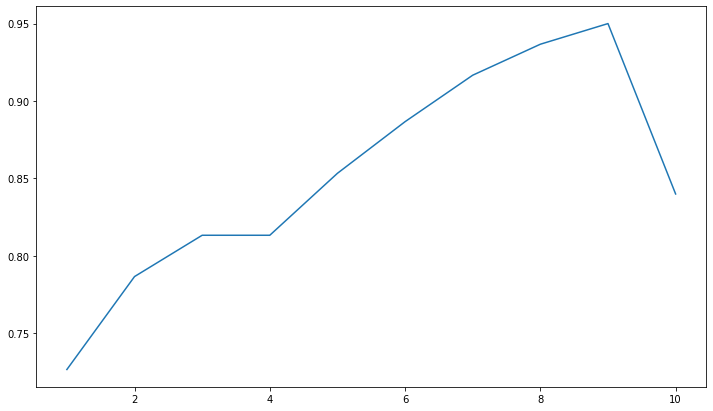

In [61]:
# Creating plot of accuracy vs. level for the small dataset 
# with backward elimination
bwd_sml_acc = [acc_small_bwd[i][0] for i in range(0,len(acc_small_bwd))]
plt.plot(sml_lvls,bwd_sml_acc)
plt.show()

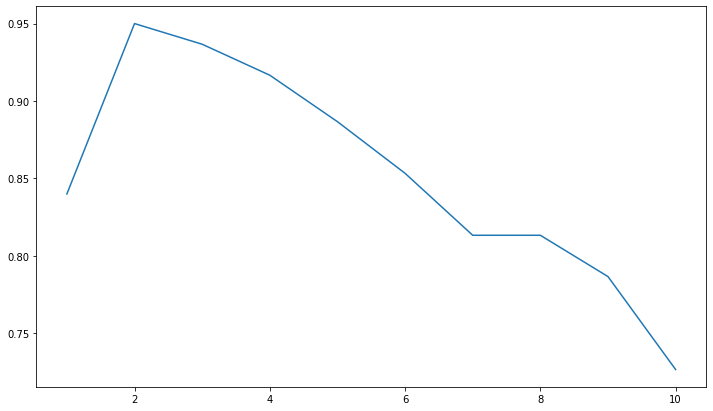

In [67]:
# Creating plot of accuracy vs. number of features
# for backward elimination
#sml_bwd_sort = sorted(acc_small_bwd, key = getKey)
sml_numftr_bwd = [len(acc_small_bwd[i][1]) for i in range(0,len(acc_small_bwd))]
plt.plot(sml_numftr_bwd,bwd_sml_acc)
plt.show()

In [69]:
acc_small_bwd

[(0.7266666666666667, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]),
 (0.7866666666666666, [1, 2, 3, 4, 5, 6, 7, 9, 10]),
 (0.8133333333333334, [1, 2, 3, 4, 6, 7, 9, 10]),
 (0.8133333333333334, [2, 3, 4, 6, 7, 9, 10]),
 (0.8533333333333334, [3, 4, 6, 7, 9, 10]),
 (0.8866666666666667, [4, 6, 7, 9, 10]),
 (0.9166666666666666, [4, 6, 9, 10]),
 (0.9366666666666666, [4, 6, 10]),
 (0.95, [4, 6]),
 (0.84, [4])]

In [68]:
sml_numftr_bwd

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [11]:
##### Backward Elimination with Large Dataset #######
print(datetime.datetime.now().time())
start = time.time()
# Testing the ftr_search function with the large dataset
#acc_large_bwd = backward_ftr_search(large_scaled)
end = time.time()
temp = end-start
print(temp)
hours = temp//3600
temp = temp - 3600*hours
minutes = temp//60
seconds = temp - 60*minutes
print('%d:%d:%d' %(hours,minutes,seconds))
print(f"--- {(time.time() - start)/60:.4f} minutes ---")
print(datetime.datetime.now().time())

09:00:38.603109
0.00020384788513183594
0:0:0
--- 0.0002 minutes ---
09:00:38.621195


In [ ]:
# Creating plot of accuracy vs. level for the large dataset 
# with backward elimination
bwd_large_acc = [acc_large_bwd[i][0] for i in range(0,len(acc_large_bwd))]
plt.plot(large_lvls,bwd_large_acc)
plt.show()

In [ ]:
# Creating plot of accuracy vs. number of features
# for backward elimination
#sml_bwd_sort = sorted(acc_small_bwd, key = getKey)
large_numftr_bwd = [len(acc_large_bwd[i][1]) for i in range(0,len(acc_large_bwd))]
plt.plot(large_numftr_bwd,bwd_large_acc)
plt.show()

In [8]:
# Creating a user interface so that the user can choose 
# which search algorithm to use and which dataset to use.
def main():
    # Asking the user for a data file 
    file = input("This is a Feature Selection Algorithm for the kNN classification method.\
          \n Please type in the name of the file you want to test:")
    file_success = False
    while not file_success:
        # Testing to make sure the file can be loaded
        try:
            mat = np.loadtxt(file)
            file_success = True
        except:
            print("Please enter a valid file")
    
    # Placeholder for search algo to start while loop
    search = 0
    # Making sure user enter's valid search algorithm
    while search != 1 and search != 2:
        print(search != 1)
        # Asking the user which algorithm they want to use
        search = int(input("Enter the search algorithm you want to use: (1) Forward Selection (2) Backward Elimination:"))
        print(search)
    # Run kNN with the corresponding search algorithm
    #if search == 1: # forward 
    #    fwd_acc = fwd_ftr_search(mat)
    #else: # backward
     #   bwd_acc = fwd_ftr_search(mat)

In [9]:
main()

This is a Feature Selection Algorithm for the kNN classification method.          
 Please type in the name of the file you want to test:22
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Pl

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter a valid file
Please enter

KeyboardInterrupt: 

In [33]:
print("hello\nworld")

hello
world


In [ ]:
CS205_small_testdata__3.txt